In [38]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Load Dataset
df = pd.read_csv('../data/heart.csv')

print("Data loaded successfully")



Data loaded successfully


In [40]:
df.shape

(1025, 14)

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
# Remove Duplicates and Handle Missing Values
print("Null values:", df.isnull().sum().sum())
#Replace all missing numeric values with the median of their respective columns
#df = df.fillna(df.median())
df.shape


Null values: 0


(1025, 14)

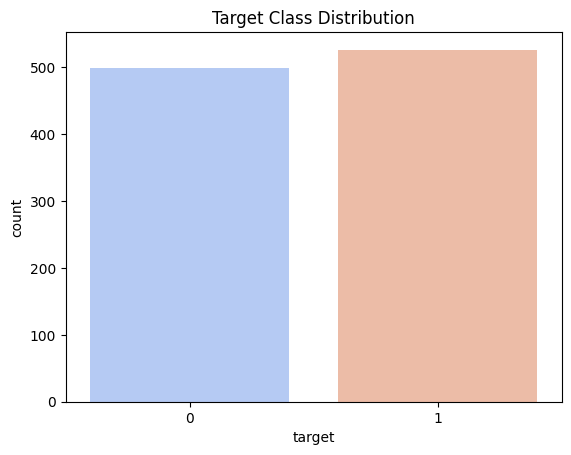

In [46]:
# Target distribution
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Target Class Distribution")
plt.show()

In [47]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

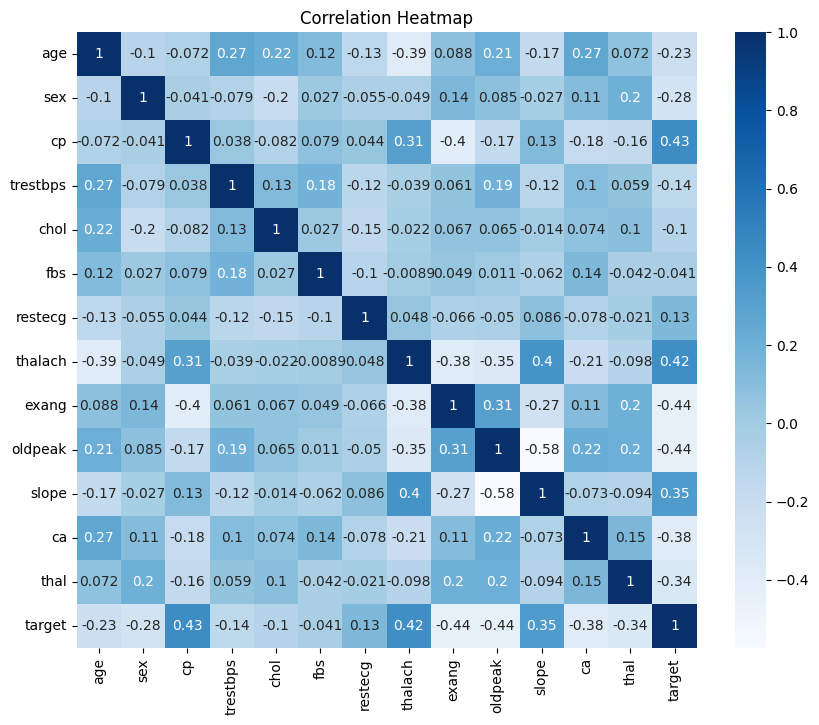

In [48]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1500x1000 with 0 Axes>

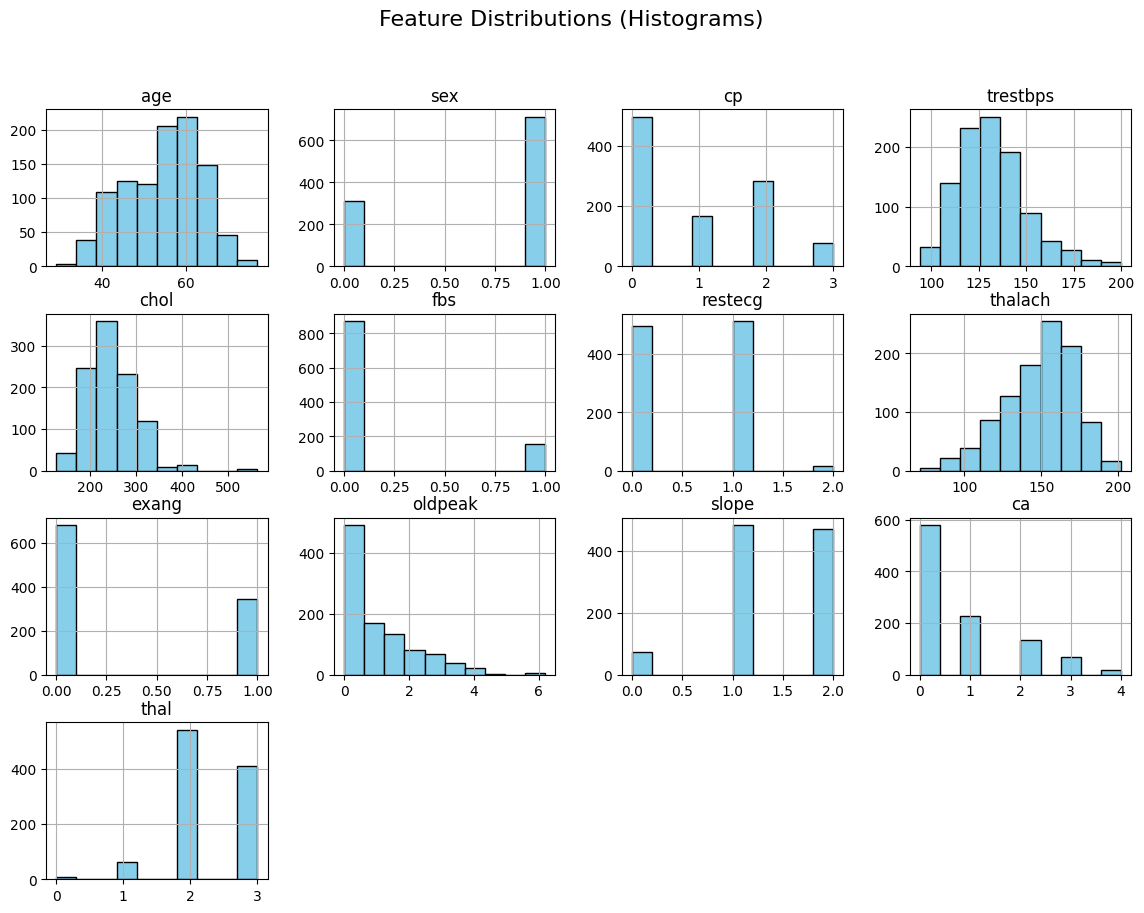

In [49]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col != 'target']

plt.figure(figsize=(15,10))
df[num_cols].hist(figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()


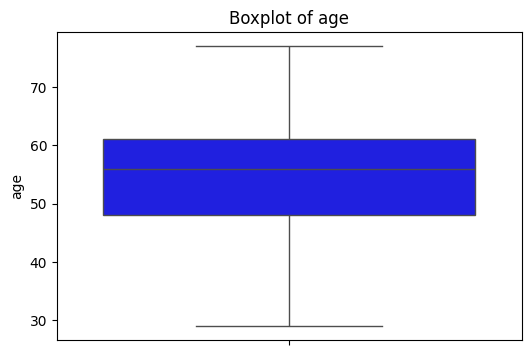

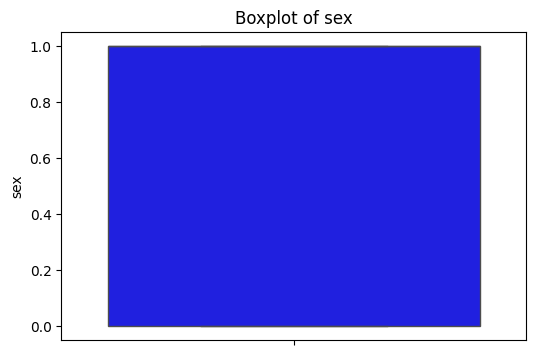

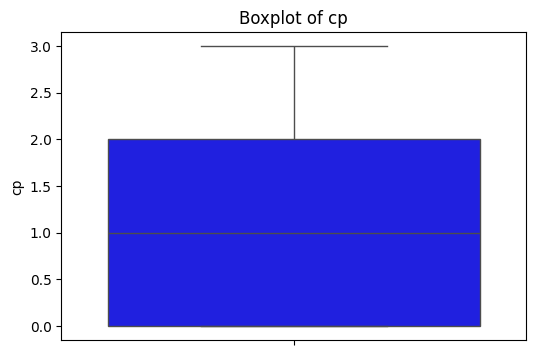

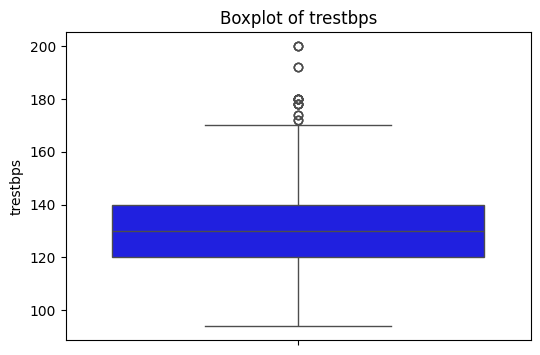

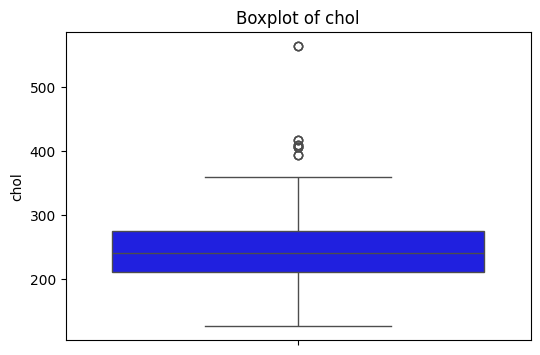

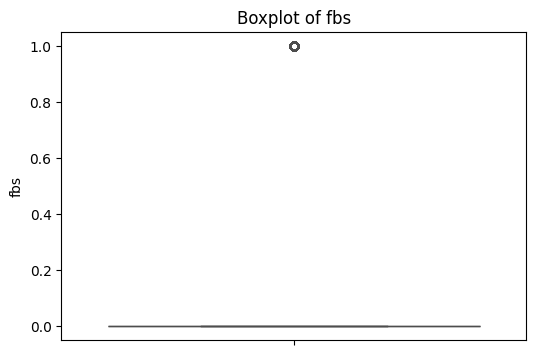

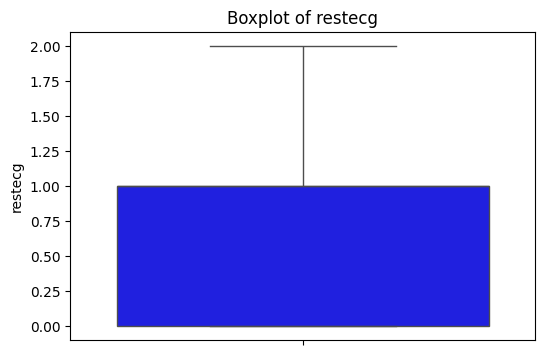

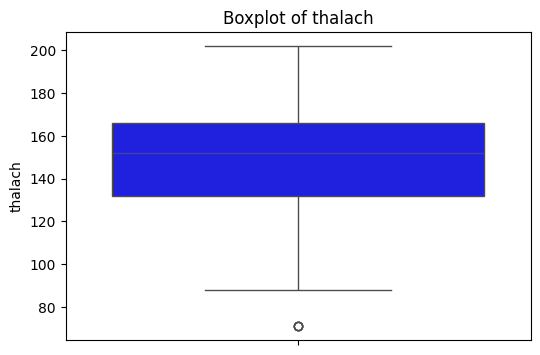

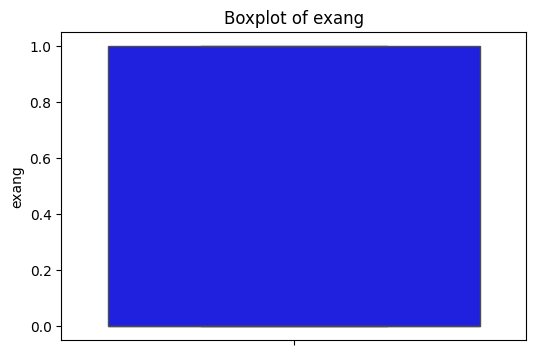

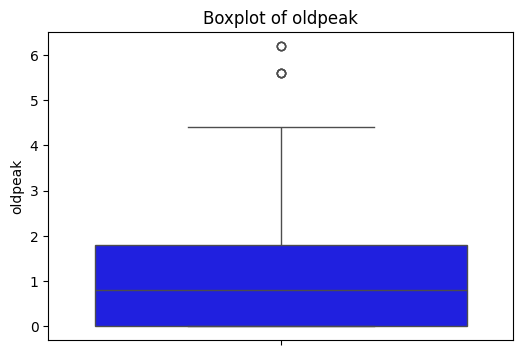

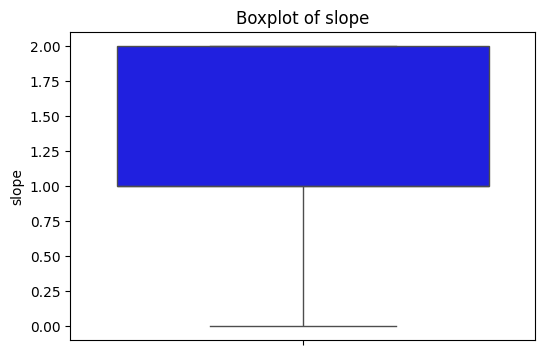

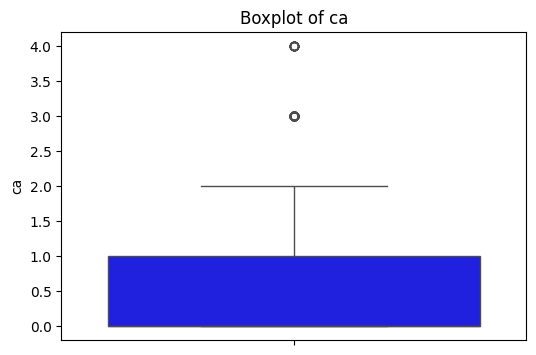

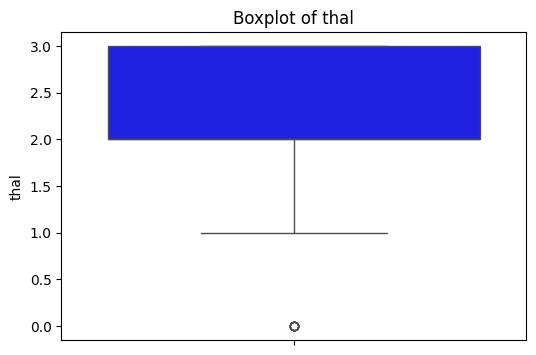

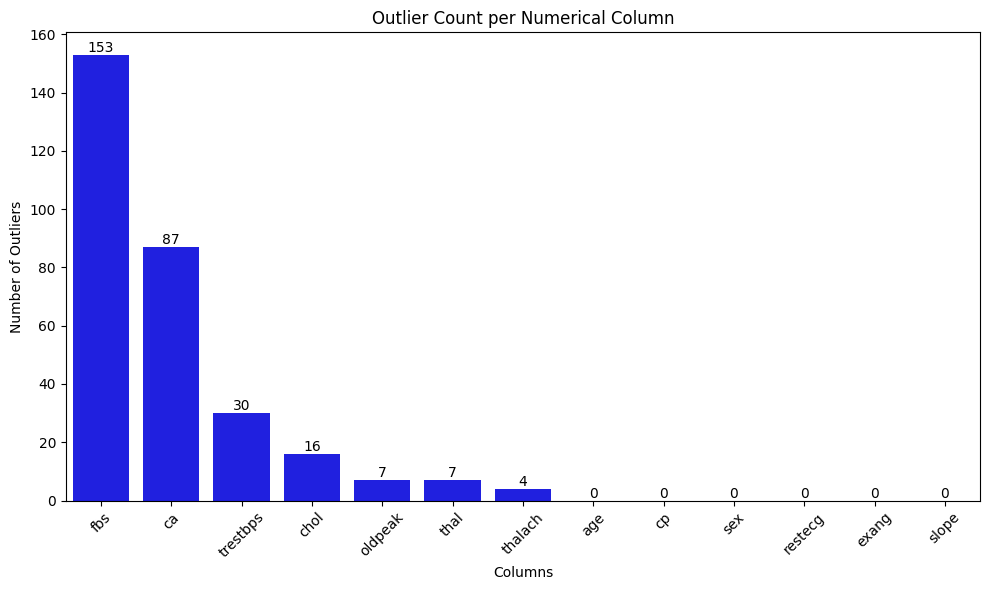

In [50]:

#  Vertical Blue Boxplots for Each Numerical Column
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color='blue')  # vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()
# IQR-based Outlier Detection Function
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers.shape[0]

# Count Outliers for Each Numerical Column
outlier_counts = {col: detect_outliers_iqr(df, col) for col in num_cols}
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)

# Vertical Bar Plot for Outlier Counts
plt.figure(figsize=(10,6))
sns.barplot(x=outlier_df.index, y='Outlier Count', data=outlier_df.reset_index(), color='blue')

# Add counts on top of bars
for i, count in enumerate(outlier_df['Outlier Count']):
    plt.text(i, count + 1, str(count), ha='center', fontsize=10)

plt.title("Outlier Count per Numerical Column")
plt.xlabel("Columns")
plt.ylabel("Number of Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))
    return df

for col in num_cols:
    df = cap_outliers(df, col)

print("Outliers capped using IQR successfully!")


Outliers capped using IQR successfully!


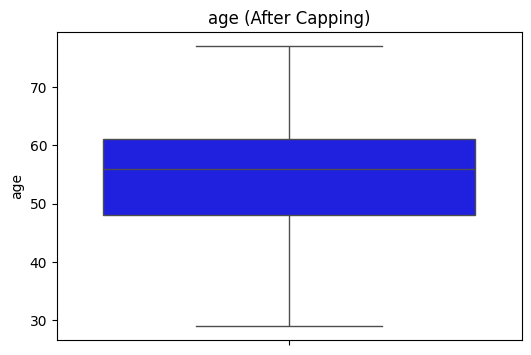

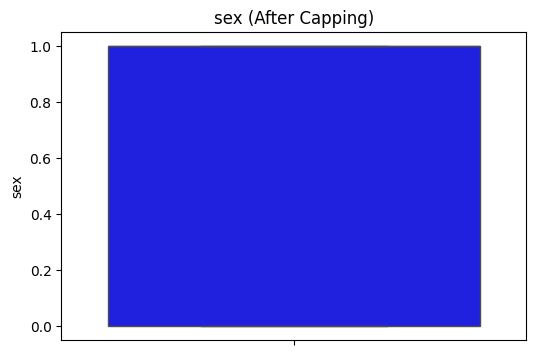

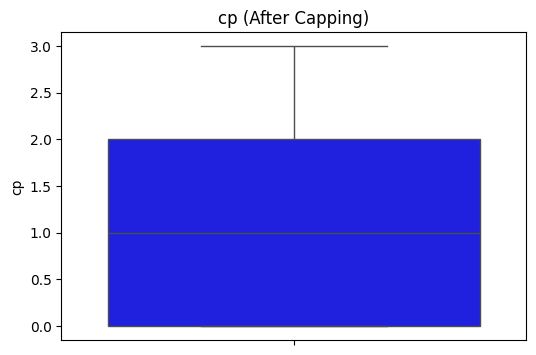

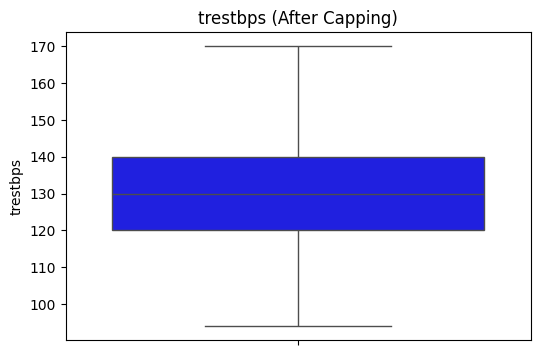

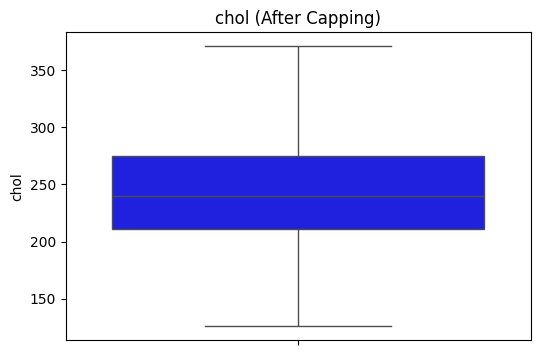

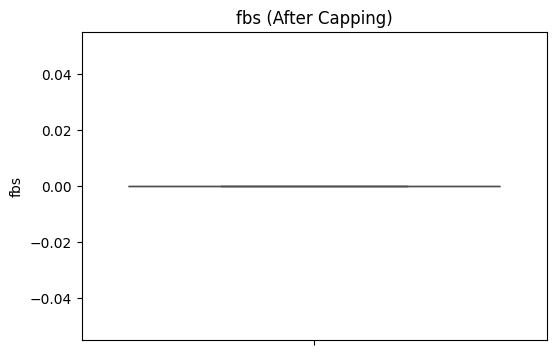

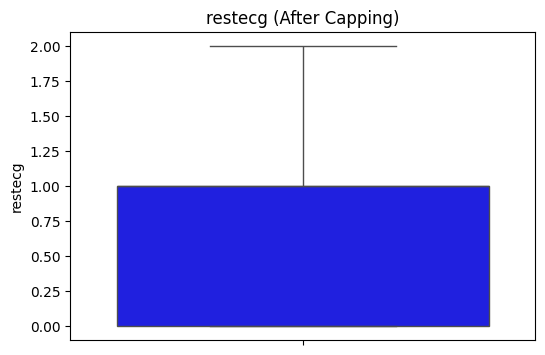

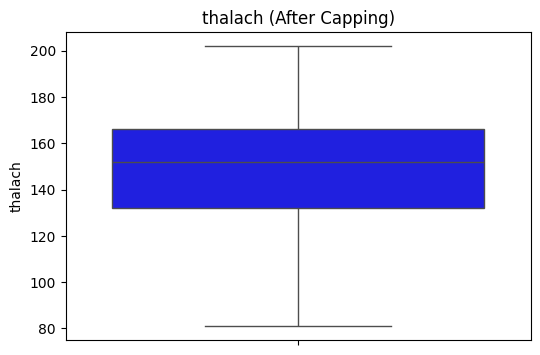

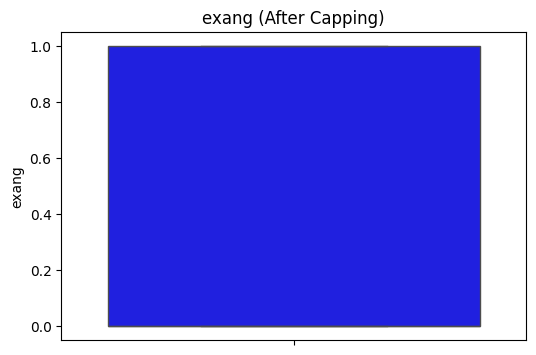

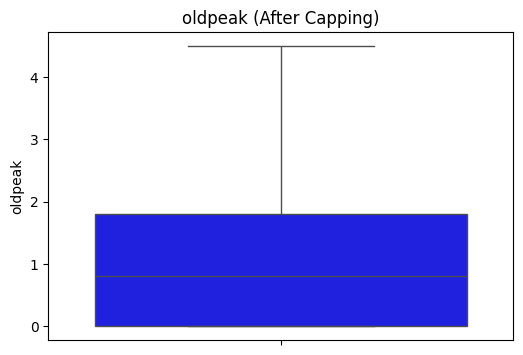

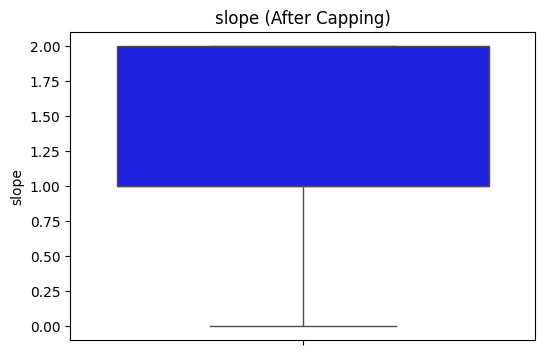

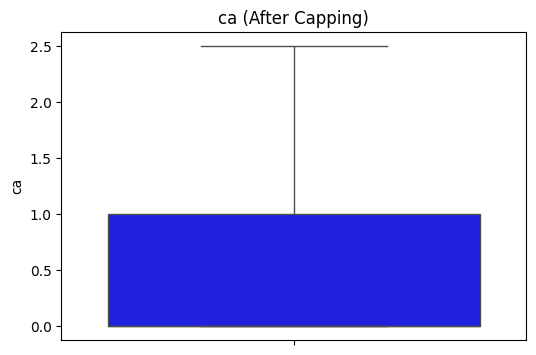

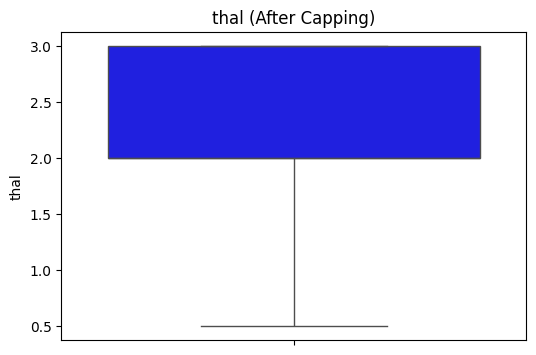

In [52]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color='blue')  # vertical boxplot
    plt.title(f"{col} (After Capping)")
    plt.ylabel(col)
    plt.show()


In [53]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (820, 13) Test shape: (205, 13)


In [54]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, f1, roc])
    print(f"{name} trained Successfully.")

results_df = pd.DataFrame(results, columns=['Model','Accuracy','F1','ROC AUC']).sort_values(by='Accuracy', ascending=False)
results_df


Logistic Regression trained Successfully.
Decision Tree trained Successfully.
Random Forest trained Successfully.
XGBoost trained Successfully.
SVM trained Successfully.
KNN trained Successfully.


,Model,Accuracy,F1,ROC AUC
3,XGBoost,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000
1,Decision Tree,0.985366,0.985507,0.985714
4,SVM,0.892683,0.898148,0.971524
0,Logistic Regression,0.863415,0.873874,0.938571
5,KNN,0.863415,0.867925,0.962095


 **Hyperparameter Tuning**

In [55]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(pipe_rf, param_grid=param_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)


Best Random Forest Params: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}


In [56]:
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

param_xgb = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.01, 0.05, 0.1]
}

random_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=param_xgb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_xgb.fit(X_train, y_train)
best_xgb = random_xgb.best_estimator_
print("Best XGBoost Params:", random_xgb.best_params_)


Best XGBoost Params: {'xgb__n_estimators': 200, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.1}


In [57]:
#  Decision Tree (GridSearchCV)
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

param_dt = {
    'dt__max_depth': [3, 5, 7, 10, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(pipe_dt, param_grid=param_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

print("Best Decision Tree Params:", grid_dt.best_params_)


Best Decision Tree Params: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_split': 2}


In [58]:
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

param_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(pipe_svm, param_grid=param_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Params:", grid_svm.best_params_)


Best SVM Params: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [59]:
tuned_models = {
    'XGBoost (Tuned)': best_xgb,
    'Random Forest (Tuned)': best_rf,
    'SVM (Tuned)': best_svm,
    'Decision Tree (Tuned)': best_dt
}

tuned_results = []
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    tuned_results.append([name, acc, f1, roc])

tuned_df = pd.DataFrame(tuned_results, columns=['Model','Accuracy','F1','ROC AUC']).sort_values(by='Accuracy', ascending=False)
tuned_df



,Model,Accuracy,F1,ROC AUC
0,XGBoost (Tuned),1.000000,1.000000,1.000000
1,Random Forest (Tuned),1.000000,1.000000,1.000000
2,SVM (Tuned),0.995122,0.995215,0.999714
3,Decision Tree (Tuned),0.985366,0.985507,0.985714


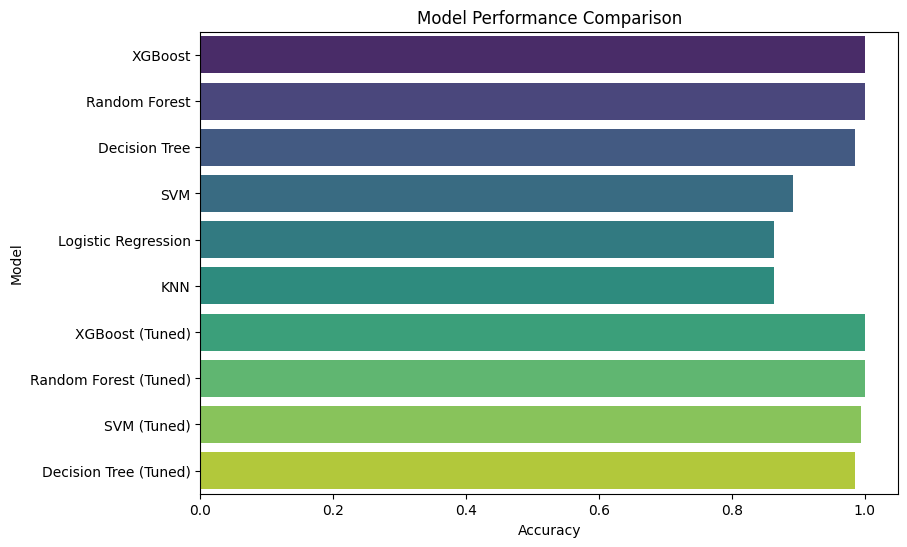

In [60]:
comparison_df = pd.concat([results_df, tuned_df])
plt.figure(figsize=(9,6))
sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.show()


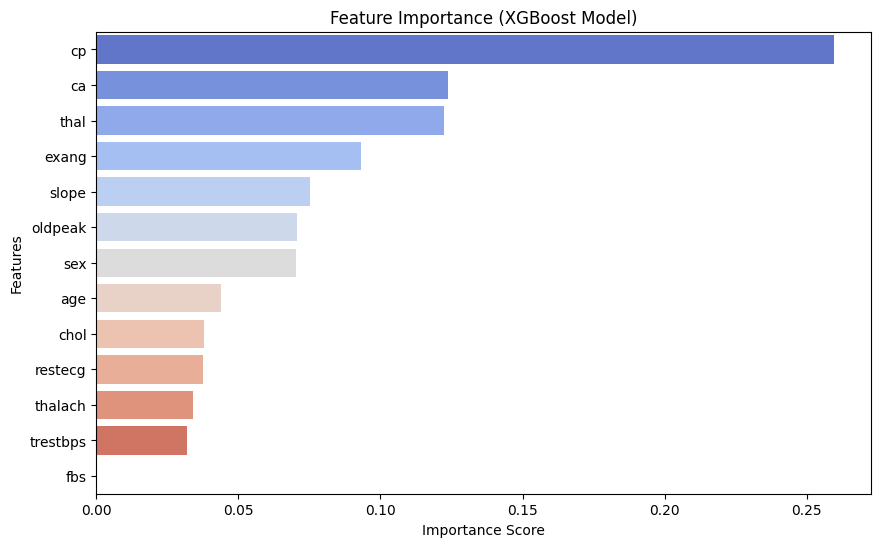

,Feature,Importance
2,cp,0.259702
11,ca,0.123616
12,thal,0.122319
8,exang,0.093233
10,slope,0.075043
9,oldpeak,0.070671
1,sex,0.070172
0,age,0.043783
4,chol,0.037789
6,restecg,0.037487


In [61]:
# Feature Importance for Tree-Based Models (like Random Forest or XGBoost)
importances = best_xgb.named_steps['xgb'].feature_importances_  # Extract from XGB inside pipeline
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title("Feature Importance (XGBoost Model)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

importance_df


In [62]:
best_model = best_xgb  # Change based on your best performer
joblib.dump(best_model, '../models/best_model.joblib')
print(" Best model saved successfully!")


 Best model saved successfully!
